# Kaggle Titanic Competition

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

## Data + Data Exploration + Data Cleanup

In [2]:
trainSet = pd.read_csv("Data/train.csv")
testSet = pd.read_csv("Data/test.csv")

In [3]:
trainSet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
trainSet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Drop passengerID since it has no effect on survived
trainSet.drop(columns = 'PassengerId', inplace=True)
testSet.drop(columns = 'PassengerId', inplace=True)

In [6]:
#Standardize the columns names
trainSet.columns= trainSet.columns.str.strip().str.lower()
testSet.columns= testSet.columns.str.strip().str.lower()

In [7]:
#Check columns between train and test
trainSet.columns, testSet.columns

(Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked'],
       dtype='object'),
 Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
        'cabin', 'embarked'],
       dtype='object'))

In [8]:
#Describe the dataframe
trainSet.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Print number of missing values by column
columns = list(trainSet.columns)

for col in columns:
    
    print(col+" "+str(trainSet[col].isna().sum()))

survived 0
pclass 0
name 0
sex 0
age 177
sibsp 0
parch 0
ticket 0
fare 0
cabin 687
embarked 2


<AxesSubplot: >

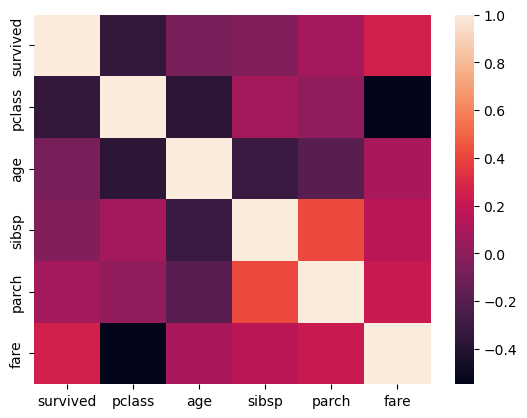

In [10]:
#View correlation of numeric columns x numeric columns
corr = trainSet.corr(numeric_only=True)

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [11]:
#View the sex column
trainSet['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [12]:
#Unique values in sex column 
trainSet['sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
#Encode the sex column
trainSet['sex'].replace(['male','female'],[0,1],inplace=True)
trainSet['sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [14]:
#View the embarked column
trainSet['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [15]:
#Unique values in embarked column
trainSet['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
#Encode the embarked column nan values
trainSet['embarked'].fillna(0,inplace=True)
trainSet['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [17]:
#Enscode the embarked column other values
trainSet['embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
trainSet['embarked']

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    3
Name: embarked, Length: 891, dtype: int64

In [18]:
#Repeat this process for the test set
columns = list(testSet.columns)

for col in columns:
    
    print(col+" "+str(testSet[col].isna().sum()))

pclass 0
name 0
sex 0
age 86
sibsp 0
parch 0
ticket 0
fare 1
cabin 327
embarked 0


In [19]:
testSet['sex'].replace(['male','female'],[0,1],inplace=True)
testSet['embarked'].fillna(0,inplace=True)
testSet['embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
testSet['embarked']

0      3
1      1
2      3
3      1
4      1
      ..
413    1
414    2
415    1
416    1
417    2
Name: embarked, Length: 418, dtype: int64

In [20]:
trainSet

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2


In [21]:
testSet

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1
414,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
415,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1


In [22]:
#Drop the name, ticket, and cabin columns in both sets
trainSet.drop(['name','ticket','cabin'], axis = 1, inplace = True)
testSet.drop(['name','ticket','cabin'], axis = 1, inplace = True)

In [23]:
trainSet

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,NaN,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


In [24]:
#New index for later when we combine the two sets to fill missing values but retain test
newIndex = list(range(891,891+len(testSet.index)))
testSet.index = newIndex

In [25]:
testSet

,pclass,sex,age,sibsp,parch,fare,embarked
891,3,0,34.5,0,0,7.8292,3
892,3,1,47.0,1,0,7.0000,1
893,2,0,62.0,0,0,9.6875,3
894,3,0,27.0,0,0,8.6625,1
895,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
1304,3,0,NaN,0,0,8.0500,1
1305,1,1,39.0,0,0,108.9000,2
1306,3,0,38.5,0,0,7.2500,1
1307,3,0,NaN,0,0,8.0500,1


## Data Imputation

In [26]:
#Concat test to end of train (we know indices of both train and test)
mergeSet = pd.concat([trainSet, testSet])
#We will use all columns (except response -> 'survived') to impute the others.
#We can't use response since it would taint our test set response never being seen 
mergeSet.drop('survived',axis=1,inplace=True)
mergeSet

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
1304,3,0,NaN,0,0,8.0500,1
1305,1,1,39.0,0,0,108.9000,2
1306,3,0,38.5,0,0,7.2500,1
1307,3,0,NaN,0,0,8.0500,1


In [28]:
#Now we can run a missing value algorithm on columns with na/nan 
imputer = MissForest()
X_imputed = imputer.fit_transform(mergeSet)

Iteration: 0
Iteration: 1
Iteration: 2


In [31]:
#Imputed values for the mergeSet
imputedFrame = pd.DataFrame(X_imputed)
imputedFrame.columns = mergeSet.columns
imputedFrame

,pclass,sex,age,sibsp,parch,fare,embarked
0,3.0,0.0,22.000000,1.0,0.0,7.2500,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,2.0
2,3.0,1.0,26.000000,0.0,0.0,7.9250,1.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,1.0
4,3.0,0.0,35.000000,0.0,0.0,8.0500,1.0
...,...,...,...,...,...,...,...
1304,3.0,0.0,30.273076,0.0,0.0,8.0500,1.0
1305,1.0,1.0,39.000000,0.0,0.0,108.9000,2.0
1306,3.0,0.0,38.500000,0.0,0.0,7.2500,1.0
1307,3.0,0.0,30.273076,0.0,0.0,8.0500,1.0


## Modeling

## Results